In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%precision 3
pd.set_option('precision', 3)

In [21]:
'''
3. 데이터 샘플링 : np.random.choice()
이 함수는 다음과 같은 인수를 가진다.

np.random.choice(a, size=None, replace=True, p=None)

a : 배열이면 배열 자체, 정수이면 arange(a)명령으로 배열 생성
size : 정수, 샘플 숫자
replace : boolean. True이면 복원추출, False면 비복원추출
p : 배열, 각 데이터가 선택될 수 있는 확률
'''

'\n3. 데이터 샘플링 : np.random.choice()\n이 함수는 다음과 같은 인수를 가진다.\n\nnp.random.choice(a, size=None, replace=True, p=None)\n\na : 배열이면 배열 자체, 정수이면 arange(a)명령으로 배열 생성\nsize : 정수, 샘플 숫자\nreplace : boolean. True이면 복원추출, False면 비복원추출\np : 배열, 각 데이터가 선택될 수 있는 확률\n'

In [22]:
df = pd.read_csv('E:\python_stat\data/ch2_scores_em.csv',
                    index_col='student number')

df.head()

,english,mathematics
student number,,
1,42,65
2,69,80
3,56,63
4,41,63
5,57,76


In [23]:
scores = np.array(df['english'])[:10]
scores

array([42, 69, 56, 41, 57, 48, 65, 49, 65, 58], dtype=int64)

In [24]:
scores_df = pd.DataFrame({'score' : scores},
                        index=pd.Index(['A','B','C','D','E',
                        'F','G','H','I','J'],
                        name = 'student'))
scores_df

,score
student,
A,42
B,69
C,56
D,41
E,57
F,48
G,65
H,49
I,65


In [25]:
np.mean(scores)

55.0

In [26]:
np.median(scores)

56.5

In [27]:
scores_df.mode()

,score
0,65


In [28]:
english_scores = np.array(df['english'])
english_scores

array([42, 69, 56, 41, 57, 48, 65, 49, 65, 58, 70, 47, 51, 64, 62, 70, 71,
       68, 73, 37, 65, 65, 61, 52, 57, 57, 75, 61, 47, 54, 66, 54, 54, 42,
       37, 79, 56, 62, 62, 55, 63, 57, 57, 67, 55, 45, 66, 55, 64, 66],
      dtype=int64)

In [29]:
pd.Series(english_scores).describe()

count    50.00
mean     58.38
std       9.80
min      37.00
25%      54.00
50%      57.50
75%      65.00
max      79.00
dtype: float64

In [30]:
freq, _ = np.histogram(english_scores, bins=10, range=(0,100))
freq

array([ 0,  0,  0,  2,  8, 16, 18,  6,  0,  0], dtype=int64)

In [31]:
freq_class = [f' {i} ~ {i+10} ' for i in range(0, 100, 10)]
freq_class

[' 0 ~ 10 ',
 ' 10 ~ 20 ',
 ' 20 ~ 30 ',
 ' 30 ~ 40 ',
 ' 40 ~ 50 ',
 ' 50 ~ 60 ',
 ' 60 ~ 70 ',
 ' 70 ~ 80 ',
 ' 80 ~ 90 ',
 ' 90 ~ 100 ']

In [32]:
pd.DataFrame({'frequency':freq}, index=pd.Index(freq_class, name='class'))

,frequency
class,
0 ~ 10,0
10 ~ 20,0
20 ~ 30,0
30 ~ 40,2
40 ~ 50,8
50 ~ 60,16
60 ~ 70,18
70 ~ 80,6
80 ~ 90,0


In [33]:
class_value = [(i+(i+10))/2 for i in range(0, 100, 10)]
class_value

[5.000, 15.000, 25.000, 35.000, 45.000, 55.000, 65.000, 75.000, 85.000, 95.000]

In [34]:
rel_freq = freq / freq.sum()
rel_freq

array([0.  , 0.  , 0.  , 0.04, 0.16, 0.32, 0.36, 0.12, 0.  , 0.  ])

In [35]:
cum_rel_freq = np.cumsum(rel_freq)
cum_rel_freq

array([0.  , 0.  , 0.  , 0.04, 0.2 , 0.52, 0.88, 1.  , 1.  , 1.  ])

In [36]:
import matplotlib.pyplot as plt

%matplotlib inline

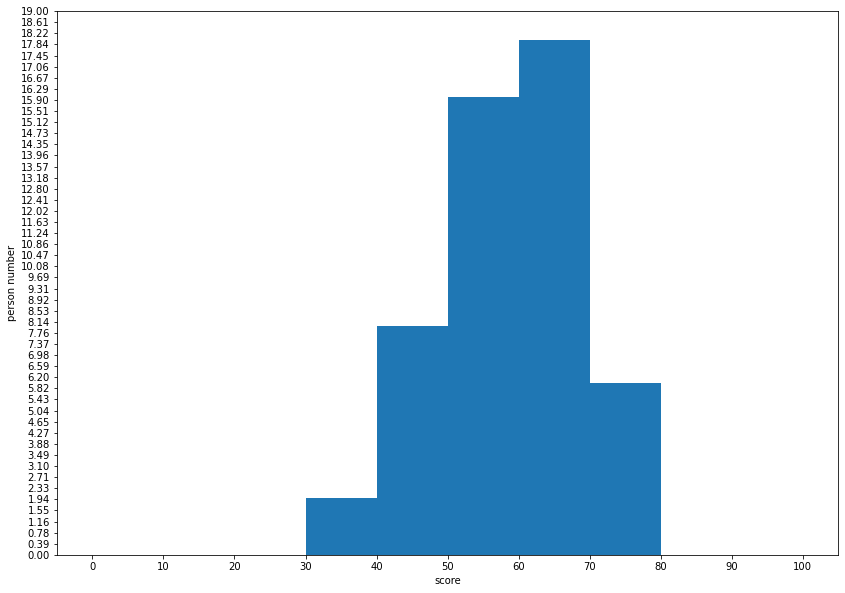

In [37]:
fig = plt.figure(figsize=(14,10))
ax = fig.add_subplot(111)

freq, _, _ = ax.hist(english_scores, bins=10, range=(0,100))
ax.set_xlabel('score')
ax.set_ylabel('person number')
ax.set_xticks(np.linspace(0, 100, 10+1))
ax.set_yticks(np.linspace(0, freq.max()+1))
plt.show()

In [38]:
# lambda 매개변수 : 결과

In [39]:
df = pd.read_csv('E:\python_stat\data/ch2_scores_em.csv')

In [40]:
df.head()

,student number,english,mathematics
0,1,42,65
1,2,69,80
2,3,56,63
3,4,41,63
4,5,57,76


In [41]:
en_scores = np.array(df['english'])[:10]
ma_scores = np.array(df['mathematics'])[:10]

scores_df = pd.DataFrame({'english' : en_scores,
                        'mathematics' : ma_scores},
                        index=pd.Index(['A','B','C','D','E',
                                        'F','G','H','I','J']))

scores_df

,english,mathematics
A,42,65
B,69,80
C,56,63
D,41,63
E,57,76
F,48,60
G,65,81
H,49,66
I,65,78
J,58,82


In [42]:
summary_df=scores_df.copy()
summary_df['english_deviation']= \
    summary_df['english'] - summary_df['english'].mean()
summary_df['mathematics_deviation']=\
    summary_df['mathematics'] - summary_df['mathematics'].mean()
summary_df['product of deviations']=\
    summary_df['english_deviation'] * summary_df['mathematics_deviation']
summary_df


,english,mathematics,english_deviation,mathematics_deviation,product of deviations
A,42,65,-13.0,-6.4,83.2
B,69,80,14.0,8.6,120.4
C,56,63,1.0,-8.4,-8.4
D,41,63,-14.0,-8.4,117.6
E,57,76,2.0,4.6,9.2
F,48,60,-7.0,-11.4,79.8
G,65,81,10.0,9.6,96.0
H,49,66,-6.0,-5.4,32.4
I,65,78,10.0,6.6,66.0
J,58,82,3.0,10.6,31.8


In [43]:
summary_df['product of deviations'].mean()

62.800

In [44]:
cov_mat = np.cov(en_scores, ma_scores, ddof=0)
cov_mat

array([[86.  , 62.8 ],
       [62.8 , 68.44]])

In [45]:
np.cov(en_scores, ma_scores, ddof=0)[0,1] /\
    (np.std(en_scores) * np.std(ma_scores))

0.8185692341186713

In [46]:
np.corrcoef(en_scores, ma_scores)

array([[1.   , 0.819],
       [0.819, 1.   ]])

In [47]:
scores_df.corr()

,english,mathematics
english,1.000,0.819
mathematics,0.819,1.000


In [48]:
import matplotlib.pyplot as plt

%matplotlib inline

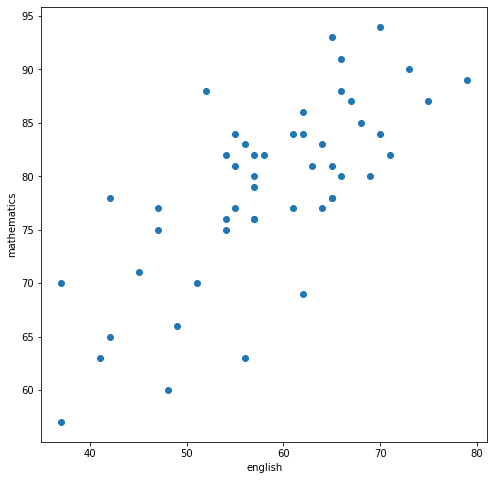

In [49]:
english_scores = np.array(df['english'])
math_scores = np.array(df['mathematics'])

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)

ax.scatter(english_scores, math_scores)
ax.set_xlabel('english')
ax.set_ylabel('mathematics')

plt.show()

In [50]:
poly_fit = np.polyfit(english_scores, math_scores, 1)
poly_fit
# poly_1d=np.poly1d(poly_fit)
# poly_1d

array([ 0.621, 42.601])

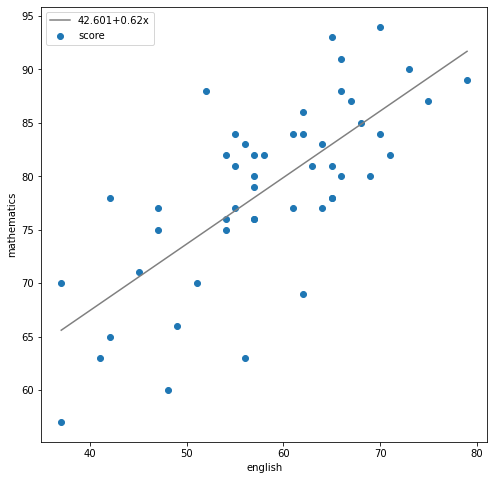

In [51]:
poly_fit = np.polyfit(english_scores, math_scores, 1)
poly_1d=np.poly1d(poly_fit)

xs = np.linspace(english_scores.min(), english_scores.max())
ys = poly_1d(xs)

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
ax.scatter(english_scores, math_scores, label='score')
ax.plot(xs, ys, color='gray',\
    label=f'{poly_fit[1]:.3f}+{poly_fit[0]:.2f}x')
ax.set_xlabel('english')
ax.set_ylabel('mathematics')

ax.legend(loc='upper left')

plt.show()

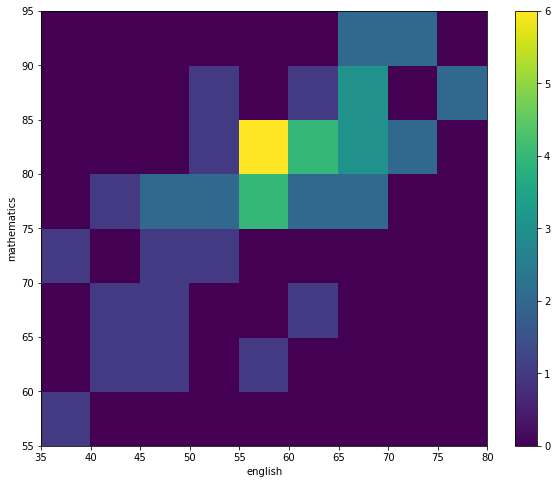

In [52]:
fig = plt.figure(figsize=(10,8))
ax=fig.add_subplot(111)

c= ax.hist2d(english_scores, math_scores,\
    bins=[9,8], range=[(35,80), (55, 95)] )
ax.set_xlabel('english')
ax.set_ylabel('mathematics')
ax.set_xticks(c[1])
ax.set_yticks(c[2])

fig.colorbar(c[3], ax=ax)
plt.show()

In [53]:
dice = [1,2,3,4,5,6]
prob = [1/21, 2/21, 3/21, 4/21, 5/21, 6/21]

In [54]:
np.random.choice(dice, p=prob)

1

In [55]:
num_trial = 100
sample = np.random.choice(dice, num_trial, p=prob);sample

array([5, 6, 2, 4, 6, 5, 6, 4, 3, 3, 3, 6, 3, 2, 5, 1, 4, 6, 5, 4, 5, 6,
       4, 6, 5, 4, 3, 6, 3, 5, 5, 4, 4, 3, 2, 5, 5, 6, 5, 2, 6, 3, 3, 1,
       5, 5, 6, 6, 1, 2, 3, 4, 4, 6, 3, 5, 5, 4, 1, 4, 2, 4, 4, 4, 6, 6,
       4, 6, 5, 2, 6, 6, 5, 6, 3, 5, 3, 5, 6, 3, 6, 6, 3, 2, 4, 6, 5, 6,
       5, 6, 1, 1, 6, 6, 4, 6, 2, 6, 6, 2])

In [56]:
freq, _ = np.histogram(sample, bins=6, range=(1,7));freq
pd.DataFrame({'frequency':freq,
            'relative frequency' : freq / num_trial},
            index = pd.Index(np.arange(1,7), name='dice'))

,frequency,relative frequency
dice,,
1,6,0.06
2,10,0.10
3,15,0.15
4,18,0.18
5,21,0.21
6,30,0.30


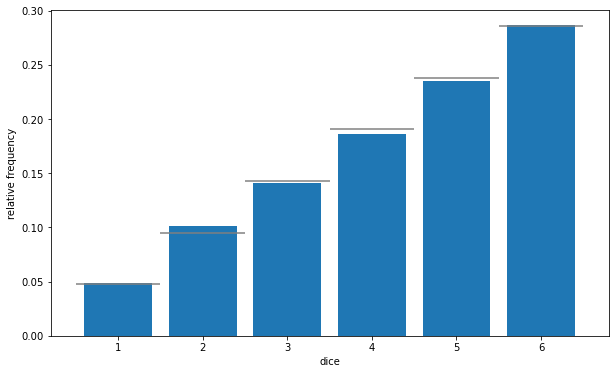

In [57]:
num_trial = 10000
sample = np.random.choice(dice, num_trial, p=prob);sample

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
ax.hist(sample, bins=6, range=(1,7), density=True, rwidth=0.8)
ax.hlines(prob, np.arange(1,7), np.arange(2,8), colors='gray')
ax.set_xticks(np.linspace(1.5,6.5,6))
ax.set_xticklabels(np.arange(1,7))
ax.set_xlabel('dice')
ax.set_ylabel('relative frequency')
plt.show()

In [59]:
df = pd.read_csv('e:/python_stat/data/ch4_scores400.csv')
scores=np.array(df['score'])

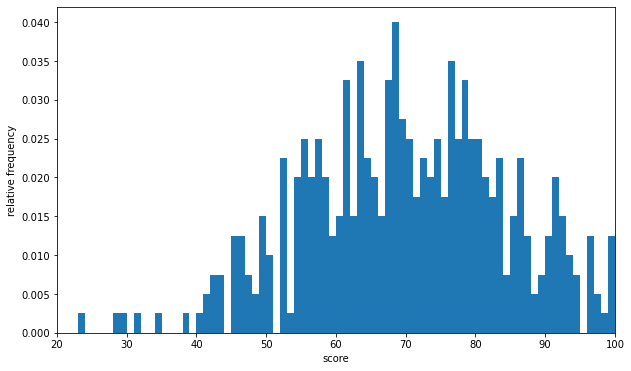

In [60]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
ax.hist(scores, bins=100, range=(0,100), density=True)
ax.set_xlim(20,100)
ax.set_ylim(0,0.042)
ax.set_xlabel('score')
ax.set_ylabel('relative frequency')
plt.show()

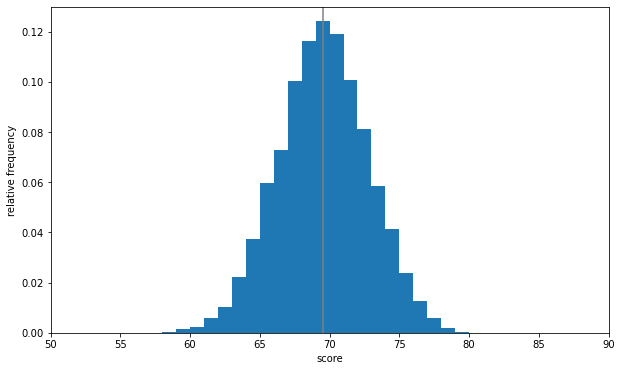

In [67]:
sample_mean = [np.random.choice(scores, 20).mean() for _ in range(10000) ]

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
ax.hist(sample_mean, bins=100, range=(0,100), density=True)
ax.vlines(np.mean(scores), 0, 1,'gray')
ax.set_xlim(50,90)
ax.set_ylim(0,0.13)
ax.set_xlabel('score')
ax.set_ylabel('relative frequency')
plt.show()

In [ ]:
``